<a href="https://colab.research.google.com/github/ABHIRAM199/MY-ML-Projects/blob/main/PROJECT3_Prediction_of_Customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Use Case: Predicting Customer Churn in a Telecom Company using Logistic Regression**

OBJECTIVE

*   The primary objective of this case study is to develop a robust logistic regression model to predict customer churn within a telecom company.
*  Customer churn, or the rate at which customers discontinue their services with the company, poses a significant challenge for telecom businesses, as it directly impacts revenue and profitability.

*   By accurately identifying customers who are likely to churn/discontinue, the company can implement targeted retention strategies aimed at reducing churn rates and improving customer satisfaction.





In [68]:
#Exploring Data

import numpy as np
import pandas as pd
import seaborn as sns


In [69]:
from google.colab import drive


In [70]:
#mount google drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [71]:
churn = pd.read_csv('/content/drive/My Drive/DSML/DATA/churn_data.csv')

In [72]:
churn


,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,MT,83,area_code_415,no,no,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,0
4246,WV,73,area_code_408,no,no,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,0
4247,NC,75,area_code_408,no,no,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,0
4248,HI,50,area_code_408,no,yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,0


In [73]:
churn.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059,0.140706
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434,0.347759
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000,0.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000,0.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


In [74]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [75]:
churn.columns


Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

In [76]:
#convert 'international_plan' column to binary encoding
churn['international_plan'] = churn['international_plan'].replace({'yes':1,'no':0})

#convert 'voice_mail_plan' column to binary encoding
churn['voice_mail_plan'] = churn['voice_mail_plan'].replace({'yes':1,'no':0})

In [77]:
churn


,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,NJ,137,area_code_415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,OH,84,area_code_408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,OK,75,area_code_415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,MA,121,area_code_510,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,MT,83,area_code_415,0,0,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,0
4246,WV,73,area_code_408,0,0,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,0
4247,NC,75,area_code_408,0,0,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,0
4248,HI,50,area_code_408,0,1,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,0


**DATA SET**

<ol>
  <li>state: Customer's state of residence (categorical)</li>
  <li>account_length: Tenure with the company (numerical)</li>
  <li>area_code: Customer's area code (categorical)</li>
  <li>international_plan: Status of having an international plan (binary)</li>
  <li>voice_mail_plan: Status of having a voicemail plan (binary)</li>
  <li>number_vmail_messages: Number of voicemail messages used (numerical)</li>
  <li>total_day_minutes: Total day minutes used (numerical)</li>
  <li>total_day_calls: Total day calls made (numerical)</li>
  <li>total_day_charge: Total charges for day calls (numerical)</li>
  <li>total_eve_minutes: Total evening minutes used (numerical)</li>
  <li>total_eve_calls: Total evening calls made (numerical)</li>
  <li>total_eve_charge: Total charges for evening calls (numerical)</li>
  <li>total_night_minutes: Total night minutes used (numerical)</li>
  <li>total_night_calls: Total night calls made (numerical)</li>
  <li>total_night_charge: Total charges for night calls (numerical)</li>
  <li>total_intl_minutes: Total international minutes used (numerical)</li>
  <li>total_intl_calls: Total international calls made (numerical)</li>
  <li>total_intl_charge: Total charges for international calls (numerical)</li>
  <li>number_customer_service_calls: Number of customer service calls made (numerical)</li>
  <li>churn: Binary churn indicator (1 churned, 0 retained)/li>
</ol>

Target Variable: churn (binary indicator, 1 churned, 0 retained)


**EDA**



*   find variables that have some relation with churn

*   Remove variables that are having multicollinearity

*   check missing values


*   Remove outliers



In [78]:
#Drop the 'state' and 'area_code' columns from the DataFrame 'churn'
churn = churn.drop(['state','area_code'],axis=1)

In [79]:
#Inspecting target variable
churn.churn.value_counts()

0    3652
1     598
Name: churn, dtype: int64

In [80]:
churn.churn.value_counts(normalize = True)

0    0.859294
1    0.140706
Name: churn, dtype: float64

Target variable "churn" shows imbalance: only 14.07 % of observations indicate churn

In [81]:
#Imbalanced Data

**Imbalanced Data**

<ul>
  <li>An imbalanced dataset refers to a dataset where the distribution of observations across different classes is highly skewed, with one class significantly outnumbering the others. In other words, there is a disproportionate representation of classes within the dataset. Typically, one class, known as the majority class, has a much larger number of observations compared to the minority class or classes.</li>
  <li>For example, in a binary classification problem where the goal is to predict whether a transaction is fraudulent (Class 1) or not (Class 0), an imbalanced dataset may have only a small percentage of fraudulent transactions compared to the vast majority of non-fraudulent ones. In this scenario, the fraudulent class constitutes the minority class, while the non-fraudulent class represents the majority class.</li>
</ul>



<Axes: xlabel='churn', ylabel='total_day_minutes'>

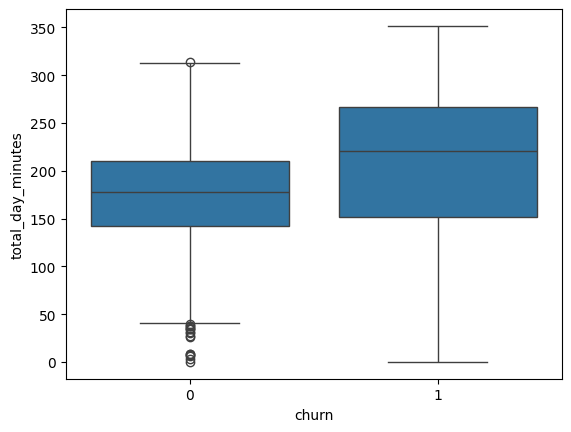

In [82]:
#Perform Exploratory Data analysis(EDA) to select variables
#Create a boxplot of 'total_day_minutes' against 'churn'
sns.boxplot(x="churn",y="total_day_minutes",data = churn)

In [83]:
#calculate the correlation matrix
corr_matrix = churn.corr()

In [84]:
#Define the target variable
target = churn['churn']

#define the feature matrix
X = churn.drop(['churn'],axis =1)

# Logistic Regression Using Sklearn

In [85]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,target,test_size=0.2,random_state=1)

In [86]:
from sklearn.linear_model import LogisticRegression

In [87]:
#create an instance of the logistic regression model
logit = LogisticRegression()

#fit the logistic regression model to the training data
logit.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [88]:
logit.intercept_

array([-0.4950453])

In [89]:
logit.coef_

array([[-2.53221040e-03,  2.00971820e+00, -2.50551214e-01,
        -2.44299253e-02,  9.74920896e-03, -1.31028418e-02,
        -1.10768644e-03,  1.42280266e-03, -1.40925576e-02,
         3.93504412e-04,  1.97262970e-04, -1.49199519e-02,
        -1.51331455e-03,  5.16207910e-02, -1.11527838e-01,
         1.32387658e-02,  4.49700456e-01]])

# Statsmodel

In [90]:
import statsmodels.api as sm

#add a constant term to the feature matrix for the intercept
X_train_sm = sm.add_constant(X_train)

#fit the logistic regression model using statsmodels
sm_model = sm.Logit(y_train,X_train_sm).fit()

Optimization terminated successfully.
         Current function value: 0.308701
         Iterations 8


In [91]:
print(sm_model.summary())

                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                 3400
Model:                          Logit   Df Residuals:                     3382
Method:                           MLE   Df Model:                           17
Date:                Fri, 22 Mar 2024   Pseudo R-squ.:                  0.2407
Time:                        09:50:40   Log-Likelihood:                -1049.6
converged:                       True   LL-Null:                       -1382.3
Covariance Type:            nonrobust   LLR p-value:                1.893e-130
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -8.9220      0.728    -12.258      0.000     -10.349      -7.495
account_length                    0.0008      0.001      0.579      0.563 

In [92]:
#Read the coefficient table from the summary of the statsmodels logistic regression model
coef_sm = pd.read_html(sm_model.summary().tables[1].as_html(),header=0,index_col=0)[0]

In [93]:
#calculate the odds ration for each coefficient
coef_sm["odds_ratio"] = np.exp(coef_sm["coef"])
coef_sm

,coef,std err,z,P>|z|,[0.025,0.975],odds_ratio
const,-8.9220,0.728,-12.258,0.000,-10.349,-7.495,1.334211e-04
account_length,0.0008,0.001,0.579,0.563,-0.002,0.004,1.000800e+00
international_plan,2.1436,0.151,14.240,0.000,1.849,2.439,8.530091e+00
voice_mail_plan,-3.2034,0.653,-4.909,0.000,-4.482,-1.924,4.062385e-02
number_vmail_messages,0.0649,0.020,3.298,0.001,0.026,0.103,1.067052e+00
total_day_minutes,6.5909,3.363,1.960,0.050,-0.000,13.182,7.284362e+02
total_day_calls,0.0018,0.003,0.650,0.515,-0.004,0.007,1.001802e+00
total_day_charge,-38.6859,19.782,-1.956,0.051,-77.457,0.086,1.580983e-17
total_eve_minutes,-0.1701,1.651,-0.103,0.918,-3.405,3.065,8.435805e-01
total_eve_calls,0.0018,0.003,0.638,0.524,-0.004,0.007,1.001802e+00


In [94]:
#predictions from statsmodel
#add a constant term to the feature matrix for the intercept in the testing data
X_test_sm = sm.add_constant(X_test)

#Make predictions using the trained statsmodels logistic regression model
pred_sm = sm_model.predict(X_test_sm)

In [95]:
#convert predicted probabilities to binary predictions using a threshold of 0.5
pred = np.where(pred_sm>0.5,1,0)

In [96]:
#predictions from sklearn model
y_pred = logit.predict(X_test)

In [97]:
#confusion matrix of statsmodel
from sklearn.metrics import confusion_matrix,precision_score,recall_score

#calculate and print the confusion matrix using predictions from statsmodel
print("stat model")
print(confusion_matrix(y_test,pred))

#calculate and print confusion matrix using predictions from scikit-learn model
print("scikit-learn model")
print(confusion_matrix(y_test,y_pred))

stat model
[[711  20]
 [ 98  21]]
scikit-learn model
[[714  17]
 [ 93  26]]


In [98]:
precision_score(y_test,y_pred)

0.6046511627906976

In [99]:
recall_score(y_test,y_pred)

0.2184873949579832

# Cutoff Values

<ul>
  <li>Cutoff values, also known as decision thresholds or classification thresholds, play a crucial role in binary classification models.</li>
  <li> In binary classification, the goal is to predict the outcome of a binary response variable, typically represented as two classes: positive (e.g., churn) and negative (e.g., non-churn).</li>
  <li>Cutoff values serve as the dividing point between these two classes, determining how the model assigns observations to each class based on their predicted probabilities.</li>
  <li>Cutoff values serve as the dividing point between these two classes, determining how the model assigns observations to each class based on their predicted probabilities.</li>
  <li>Observations with predicted probabilities above the cutoff value are assigned to the positive class, while those below the cutoff are assigned to the negative class.</li>
</ul>

**Threshold Determination:** The choice of cutoff value is often arbitrary and depends on the specific objectives and trade-offs of the classification problem. In some cases, a balanced cutoff value of 0.5 (50%) is used, meaning observations with predicted probabilities greater than or equal to 0.5 are classified as positive, while those below 0.5 are classified as negative. However, in many real-world scenarios, the optimal cutoff value may vary based on factors such as the cost of misclassification errors, class imbalance, and business priorities.

# Why cutoff 0.5?

Adjusting the cutoff value in a binary classification model can have a notable impact on various performance metrics, as it influences the trade-off between different types of classification errors.

For instance, consider an example where the initial cutoff value is set at 0.5. At this threshold, data points with predicted probabilities above 0.5 are classified as belonging to the positive class, while those with probabilities below 0.5 are classified as belonging to the negative class. This cutoff value might yield a certain distribution of predictions, leading to specific performance metrics captured by the confusion matrix.

Now, suppose we decide to lower the cutoff value to 0.3. This means that data points with predicted probabilities above 0.3 will be classified as positive, potentially resulting in a higher number of true positives and a lower number of false negatives. Conversely, there might be an increase in false positives as more data points are classified as positive. This adjustment in the cutoff value can lead to improvements in certain metrics of the confusion matrix, such as accuracy, precision, and recall (sensitivity).

For example, lowering the cutoff from 0.5 to 0.3 might increase the number of true positives and decrease the number of false negatives, consequently improving metrics like recall and F1 score. However, there might also be a trade-off with metrics like precision and specificity, which could decrease due to the higher number of false positives.

In [100]:
#Lets change the cutoff value

pred = np.where(pred_sm>0.3,1,0)
print("statsmodel")
print(confusion_matrix(y_test,pred))

statsmodel
[[665  66]
 [ 64  55]]


In [101]:
precision_score(y_test,pred)

0.45454545454545453

In [102]:
recall_score(y_test,pred)

0.46218487394957986

cutoff of 0.3 has a better performance than cutoff of 0.5

# Need for comparing Models

Comparing models is a crucial step in the model development and selection process, as it helps identify the best-performing model for a given task or dataset. By comparing different models, data scientists can evaluate their effectiveness in making predictions and determine which model is most suitable for deployment in real-world scenarios. However, the process of comparing models becomes challenging when considering variations in cutoff values and their impact on performance metrics.

**Objective Evaluation:** Comparing models allows data scientists to objectively assess their performance based on predefined metrics. These metrics typically include accuracy, precision, recall, F1 score, and area under the ROC curve (AUC), among others. By quantitatively evaluating models against these metrics, researchers can make informed decisions about which model is superior in terms of predictive accuracy and reliability.

**Selection of the Best Model:** The ultimate goal of model comparison is to identify the best-performing model that achieves the highest predictive performance on unseen data. This is essential for ensuring that the deployed model delivers accurate predictions and effectively addresses the problem at hand. Without thorough model comparison, there is a risk of selecting suboptimal models that may underperform or produce unreliable results.

**Optimization of Resources:** Model comparison helps optimize resource allocation by directing attention and resources towards models that offer the most promising performance. By identifying the most effective models early in the development process, organizations can save time, computational resources, and labor costs associated with training and evaluating multiple models.

**Enhanced Decision-Making:** Comparing models provides valuable insights into the strengths and weaknesses of different approaches, algorithms, and feature sets. This information can inform decision-making processes and guide adjustments or refinements to the modeling strategy. Additionally, it allows stakeholders to understand the trade-offs involved in selecting a particular model and make well-informed decisions based on performance metrics.

comparing models is essential for selecting the best-performing model, optimizing resource allocation,and enhancing decision-making. However, the process can be challenging due to variations in cutoff values and their impact on performance metrics, underscoring the importance of careful consideration and standardized evaluation methodologies.

# ROC Curve

[link text](https://)The Receiver Operating Characteristic (ROC) curve is a fundamental tool in the evaluation of classification models. It provides a graphical representation of the relationship between the true positive rate (TPR) and the false positive rate (FPR) at various threshold settings for a binary classification problem.


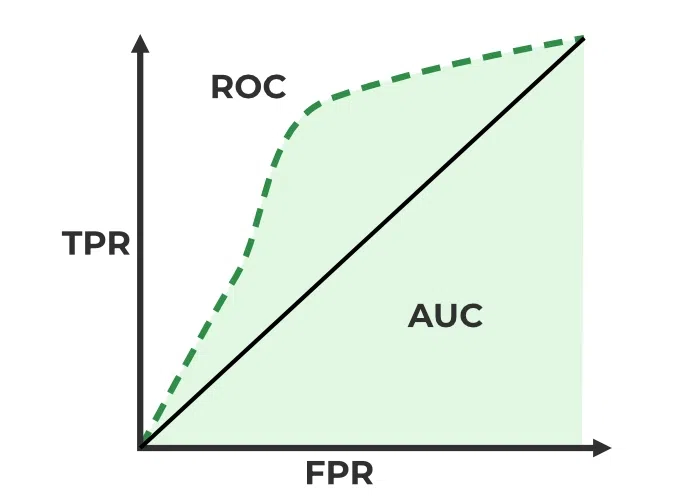






<ol>
  <li>Graphical Representation: The ROC curve is a plot of the TPR, also known as sensitivity, on the y-axis against the FPR, also known as the false alarm rate, on the x-axis. Each point on the curve represents the performance of the classifier at a specific threshold setting for converting predicted probabilities into class labels.</li>
  <li>True Positive Rate (TPR): The TPR, or sensitivity, measures the proportion of actual positive instances that are correctly identified by the classifier. Mathematically, it is calculated as the ratio of true positives to the sum of true positives and false negatives:

                      TPR = TP/(TP + FP)
  </li>
  <li>False Positive Rate (FPR): The FPR quantifies the proportion of actual negative instances that are incorrectly classified as positive by the classifier. It is calculated as the ratio of false positives to the sum of false positives and true negatives:
  
                            FPR = FP/(FP + TN)
  </li>
  <li>Threshold Settings: The ROC curve is generated by varying the classification threshold, which determines the point at which predicted probabilities are converted into class labels (e.g., positive or negative). By adjusting the threshold, the trade-off between TPR and FPR can be visualized across the entire range of possible thresholds.</li>
  <li>Performance Comparison: The ROC curve allows for the visualization and comparison of different classification models based on their discriminatory power. A model with better discrimination between positive and negative instances will exhibit a curve that is closer to the top-left corner of the plot, indicating higher TPR and lower FPR across threshold settings.</li>
  <li>Area Under the Curve (AUC): The area under the ROC curve, often abbreviated as AUC, quantifies the overall performance of a classification model. A perfect classifier would have an AUC of 1.0, while a random classifier would have an AUC of 0.5. Higher values of AUC indicate better discrimination between positive and negative instances, with values closer to 1.0 indicating superior performance.</li>
</ol>

The ROC curve provides a visual representation of the performance of classification models across different threshold settings, allowing for comparisons between models and quantification of their discriminatory power using metrics such as AUC. It is a valuable tool in model evaluation and selection for binary classification tasks.

# Simulation of ROC curve

ROC : Reciever operating characteristic curve
AOC : Area under the curve(1-> superior model)

In [103]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [104]:
#predict class probabilities for the testing data using the trained logistic regression model
y_pred = logit.predict_proba(X_test)

#y_pred now contains the predicted probabilities for each class(0 and 1) for each sample in the testing data
y_pred

array([[0.94510842, 0.05489158],
       [0.96285674, 0.03714326],
       [0.92591222, 0.07408778],
       ...,
       [0.80398831, 0.19601169],
       [0.96490769, 0.03509231],
       [0.9517835 , 0.0482165 ]])

In [105]:
#ROC graph and AUC curve
#compute the ROC curve using the predicted probabilities and true labels for the positive class
fpr,tpr,thresholds = roc_curve(y_test,y_pred[:,1],pos_label=1)

#calculate the area under the ROC curve(AUC)
roc_auc = auc(fpr,tpr)

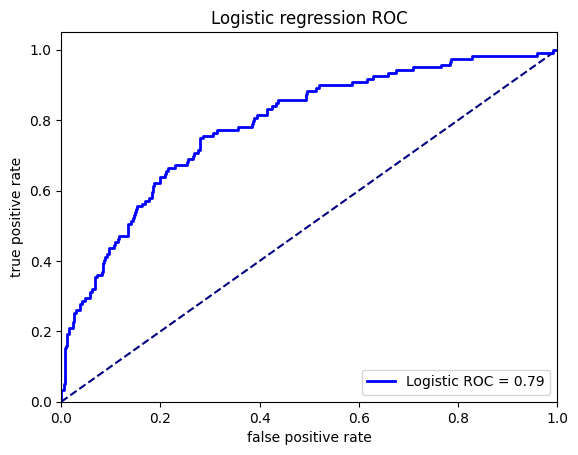

In [106]:
import matplotlib.pyplot as plt

#ROC graph Data
plt.figure()
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.plot([0,1],[0,1],color='navy',linestyle='--')  #Diagonal line representing random classifier
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title("Logistic regression ROC")
plt.plot(fpr,tpr,color='blue',lw=2,label='Logistic ROC = %0.2f' % roc_auc) #plotting ROC curve
plt.legend(loc = 'lower right') #Adding legend

plt.show() #Displaying the plot

In [107]:
#Variable selected(Just by intuition)

cols = ['total_day_minutes','total_eve_minutes','number_customer_service_calls','international_plan','number_vmail_messages'] #selected columns
X_tr = X_train[cols] #Features selected for training data
X_te = X_test[cols]  #Features selected for testing data


#print the column names of the selected features for training data
print("selected features for training data: ")
print(X_tr.columns)

selected features for training data: 
Index(['total_day_minutes', 'total_eve_minutes',
       'number_customer_service_calls', 'international_plan',
       'number_vmail_messages'],
      dtype='object')


In [108]:
logmodel = LogisticRegression()
logmodel.fit(X_tr,y_train)

LogisticRegression()

In [109]:
logmodel.coef_

array([[ 0.01367113,  0.00637418,  0.5138548 ,  2.03288793, -0.03187803]])

In [110]:
#Convert coefficients to a numpy array and reshape it
coef = np.array(logmodel.coef_)
coef = coef.reshape([len(cols),])

#create a DataFrame to store variable coefficients and odds ratios
var_coef = pd.DataFrame({'vars':cols,'coef':coef})

#calculate the odds ratios for each coefficent
var_coef['ods_ratio'] = np.exp(var_coef['coef'])

#print the odds ratios for each variable
print("odds ratios for each variable: ")
print(var_coef)

odds ratios for each variable: 
                            vars      coef  ods_ratio
0              total_day_minutes  0.013671   1.013765
1              total_eve_minutes  0.006374   1.006395
2  number_customer_service_calls  0.513855   1.671723
3             international_plan  2.032888   7.636107
4          number_vmail_messages -0.031878   0.968625


In [111]:
var_coef

,vars,coef,ods_ratio
0,total_day_minutes,0.013671,1.013765
1,total_eve_minutes,0.006374,1.006395
2,number_customer_service_calls,0.513855,1.671723
3,international_plan,2.032888,7.636107
4,number_vmail_messages,-0.031878,0.968625


In [112]:
#Make predictions using the logistic regression model on the testing data with the default cutoff of 0.5
pred = logmodel.predict(X_te) #default cutoff of 0.5

In [113]:
confusion_matrix(y_test,pred)

array([[712,  19],
       [ 99,  20]])

In [114]:
prob = logmodel.predict_proba(X_te)


In [115]:
#change the cutoff to 0.3
pred = np.where(prob[:,1]>0.3,1,0)

In [116]:
confusion_matrix(y_test,pred)

array([[669,  62],
       [ 64,  55]])

In [117]:
precision_score(y_test,pred)

0.4700854700854701

In [118]:
recall_score(y_test,pred)

0.46218487394957986

In [119]:
#predict class probabilities for the testing data using the logistic regression model
y_pred = logmodel.predict_proba(X_te)

#compute the ROC curve using the predicted probabilities and true labels for the positive class
lr_fpr,lr_tpr,thresholds = roc_curve(y_test,y_pred[:,1],pos_label=1)

#calculate the area under the ROC curve(AUC)
lr_roc_auc = auc(lr_fpr,lr_tpr)


In [120]:
lr_roc_auc

0.8106427249422341

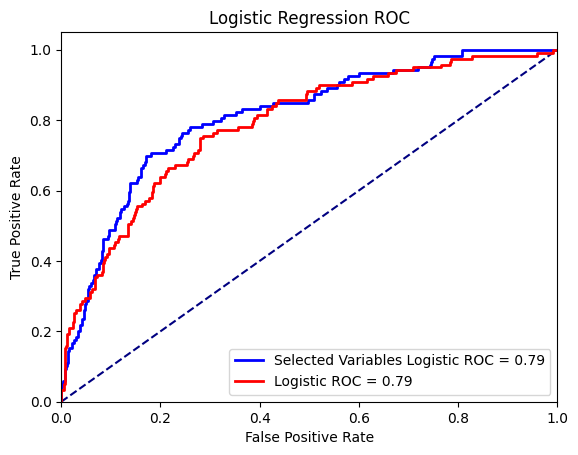

In [121]:
import matplotlib.pyplot as plt

# ROC Graph Data
plt.figure()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0,1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title("Logistic Regression ROC")
plt.plot(lr_fpr, lr_tpr, color='blue', lw=2, label='Selected Variables Logistic ROC = %0.2f' % roc_auc)  # corrected line
plt.plot(fpr, tpr, color='red', lw=2, label='Logistic ROC = %0.2f' % roc_auc)  # corrected line
plt.legend(loc ='lower right')

plt.show()

# Find Ideal Cutoff

**To find the optimal cutoff point in logistic regression using a Precision-Recall (PR) curve, you can follow these steps:**

<ol>
  <li>Train the Logistic Regression Model: Start by training your logistic regression model using your training data. This model will output probabilities of class membership, typically between 0 and 1.</li>
  <li>Predict Probabilities: Once the model is trained, use it to predict probabilities for the instances in your validation or test dataset. These probabilities represent the likelihood of each instance belonging to the positive class.</li>
  <li>Generate PR Curve: Calculate precision and recall for various cutoff values ranging from 0 to 1. You can incrementally change the cutoff value and compute precision and recall for each value.</li>
  <li>Plot the PR Curve: Plot the Precision-Recall curve using precision values on the y-axis and recall values on the x-axis. Each point on the curve represents a different cutoff value.</li>
  <li>Identify Optimal Cutoff: Look for the point on the PR curve that balances precision and recall effectively. This point represents the optimal cutoff value for your logistic regression model.</li>
</ol>

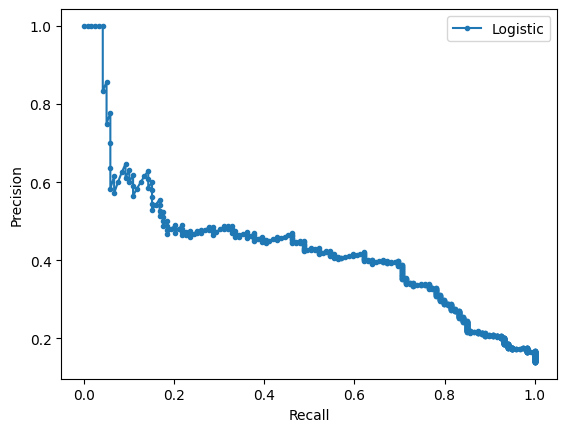

In [122]:
import numpy as np
from sklearn.metrics import precision_recall_curve

#Compute precision and recall values using the predicted probabilities and true labels
precision,recall,thresholds = precision_recall_curve(y_test,y_pred[:,1])

#plot precision-recall curve
plt.plot(recall,precision,marker='.',label = 'Logistic')

#Set axis labels
plt.xlabel("Recall")
plt.ylabel('Precision')

#show the legend
plt.legend()

#show the plot
plt.show()

In [123]:
prob = logit.predict_proba(X_test)

In [124]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score,recall_score

def prcurve(probs,actuals,cuts = np.arange(0.05,0.95,0.05)):
  #initialize arrays to store precision and recall values
  precision = np.zeros(len(cuts))
  recall = np.zeros(len(cuts))

  #iterate over each cutoff value
  for i in np.arange(len(cuts)):
    #classify predictions based on the probability cutoff
    y_preds = np.where(probs[:,1]>cuts[i],1,0)

    #compute precision and recall for the current cutoff
    precision[i] = precision_score(actuals,y_preds)
    recall[i] = recall_score(actuals,y_preds)

  #create a new figure and axis for the plot
  fig,ax = plt.subplots(figsize = [15,8])

  #plot precision-recall curve
  plt.plot(recall,precision,marker='o',linestyle='dashed',label = 'cuts')

  #set x-axis and y-axis labels
  plt.xlabel("Recall")
  plt.ylabel("Precision")

  #set title for the plot
  plt.title("precision vs Recall Curve")

  #Annotate points on the curve with the corresponding cutoff values
  for x,y,z in zip(recall,precision,cuts):
    label = "{:.2f}".format(z)
    plt.annotate(label,(x,y),textcoords='offset points',xytext=(0,5),ha='center')


  #show the plot
  plt.show()

  #optionally return precision,recall and cutoff values
  #return precision,recall,cuts

The above code defines a function prcurve that generates a precision-recall curve for evaluating the performance of a binary classification model. Given predicted probabilities (probs) and true binary labels (actuals), the function computes precision and recall scores for various probability cutoff values (cuts) ranging from 0.05 to 0.95. It then plots the precision-recall curve, annotating each point on the curve with its corresponding cutoff value. This visualization helps assess the trade-off between precision and recall at different classification thresholds, providing insights into the model's performance across various decision thresholds.

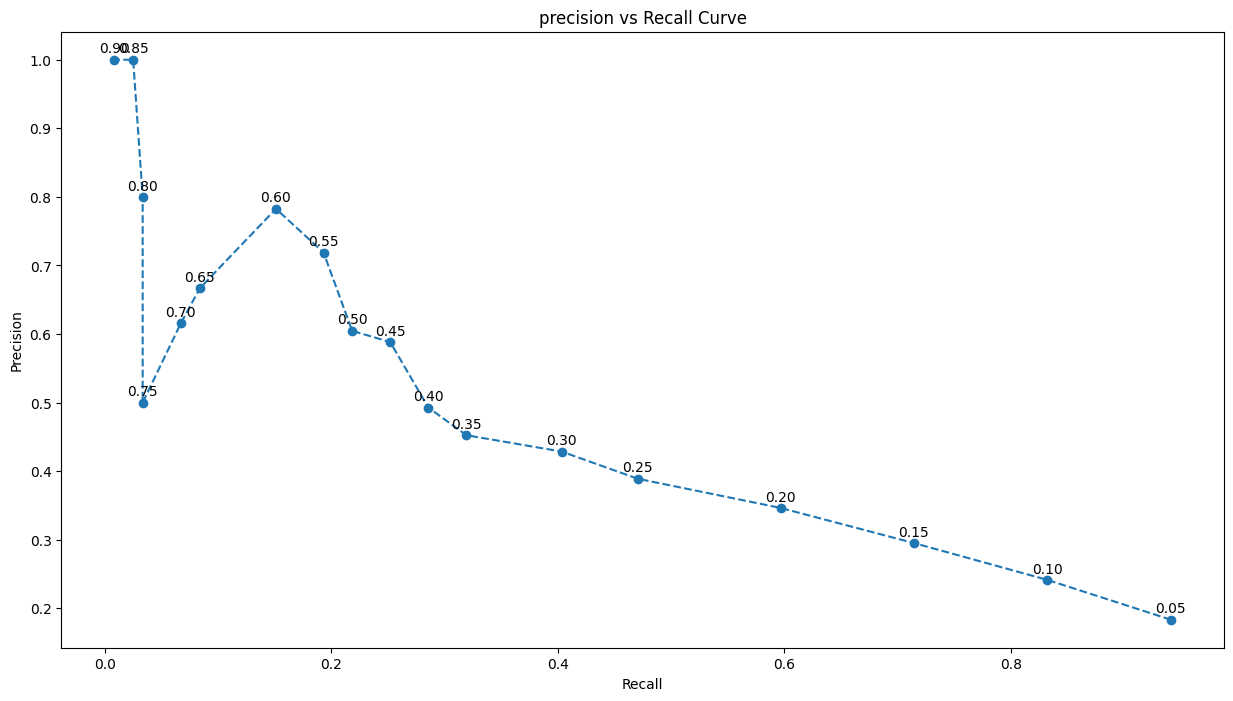

In [125]:
prcurve(prob,y_test)

# Analysis/charts

**Benchmarking for model Evaluation**

When evaluating the performance of a predictive model, it's crucial to move beyond traditional evaluation metrics like accuracy, precision, or F1 score. Instead, the focus should be on benchmarking against the business objectives. For instance, let's consider a telecom company aiming to reduce customer churn. Suppose currently, 14.07% of customers are labeled as risky, i.e., likely to churn. In this scenario, the goal of the predictive model should be to outperform this baseline. In other words, the model should identify more risky customers than the 14.07% baseline to be considered effective.

In [126]:
chart_data = X_test[['total_day_minutes','total_eve_minutes','number_customer_service_calls','international_plan','number_vmail_messages']]


In [127]:
chart_data["prob"] = prob[:,1]

<ipython-input-127-7f9dfda892ff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chart_data["prob"] = prob[:,1]


In [128]:
chart_data.head()

,total_day_minutes,total_eve_minutes,number_customer_service_calls,international_plan,number_vmail_messages,prob
1767,224.2,189.6,0,0,23,0.054892
1766,154.0,94.4,1,0,0,0.037143
219,206.2,260.0,1,0,30,0.074088
3966,220.5,180.8,1,0,0,0.057801
3772,198.2,181.0,1,0,0,0.228407


In [129]:
#sort the data based on their probability
chart_data = chart_data.sort_values(by='prob',ascending = False)

In [130]:
chart_data.head()

,total_day_minutes,total_eve_minutes,number_customer_service_calls,international_plan,number_vmail_messages,prob
4180,323.7,139.2,6,1,0,0.966579
3648,304.2,306.6,7,0,0,0.888134
3038,199.7,189.4,6,1,0,0.852157
3639,274.0,263.0,3,1,0,0.819209
2809,219.4,225.7,4,1,0,0.804308


In [131]:
chart_data.shape

(850, 6)

# Decile Analysis

Decile analysis is a powerful technique used to evaluate the performance of predictive models,particularly in customer churn prediction scenarios.The Process involves dividing customers into ten equal groups,or deciles, based on their predicted probabilities of churning.This segmentation allows for a granular assessment of the model's performance

Once the customers are sorted into deciled, the churn rate within each decile is calculated and compared.Ideally, the top decile should contain significantly higher proportion of churners compared to the bottom decile.This pattern indicates that the model is effectively identifying customers at risk of churning

In [132]:
chart_data['decile'] = pd.qcut(chart_data['prob'],10)

In [133]:
chart_data.head()

,total_day_minutes,total_eve_minutes,number_customer_service_calls,international_plan,number_vmail_messages,prob,decile
4180,323.7,139.2,6,1,0,0.966579,"(0.34, 0.967]"
3648,304.2,306.6,7,0,0,0.888134,"(0.34, 0.967]"
3038,199.7,189.4,6,1,0,0.852157,"(0.34, 0.967]"
3639,274.0,263.0,3,1,0,0.819209,"(0.34, 0.967]"
2809,219.4,225.7,4,1,0,0.804308,"(0.34, 0.967]"


In [134]:
chart_data['row'] = np.arange(1,chart_data.shape[0]+1)


In [135]:
chart_data

,total_day_minutes,total_eve_minutes,number_customer_service_calls,international_plan,number_vmail_messages,prob,decile,row
4180,323.7,139.2,6,1,0,0.966579,"(0.34, 0.967]",1
3648,304.2,306.6,7,0,0,0.888134,"(0.34, 0.967]",2
3038,199.7,189.4,6,1,0,0.852157,"(0.34, 0.967]",3
3639,274.0,263.0,3,1,0,0.819209,"(0.34, 0.967]",4
2809,219.4,225.7,4,1,0,0.804308,"(0.34, 0.967]",5
...,...,...,...,...,...,...,...,...
799,154.4,221.4,0,0,34,0.006729,"(0.0029100000000000003, 0.0254]",846
2625,134.2,211.9,1,0,32,0.005137,"(0.0029100000000000003, 0.0254]",847
2487,108.6,206.4,0,0,40,0.004376,"(0.0029100000000000003, 0.0254]",848
2691,29.9,129.1,2,0,43,0.004097,"(0.0029100000000000003, 0.0254]",849


In [136]:
chart_data['decile'] = np.ceil(chart_data['row']/((chart_data.shape[0]+1)/10))

In [137]:
chart_data.decile.value_counts()

1.0     85
2.0     85
3.0     85
4.0     85
5.0     85
6.0     85
7.0     85
8.0     85
9.0     85
10.0    85
Name: decile, dtype: int64

In [138]:
chart_data['target'] = y_test

# Lift Analysis

Lift analysis is another important aspect of evaluating predictive models,especially in the context of customer churn prediction.Lift quantifies how much better the model performs compared to a random selection.To calculate lift,we compare the churn rate within each decile to the overall churn rate

A high lift value indicates that the model is effective at identifying risky customers.For example,if the churn rate in the top decile is five times higher than the overall churn rate,the lift for that decile would be 5.This means that targeting customers in the top decile is five times more effective than random targeting

In [141]:
lift = chart_data.groupby('decile').agg({ #groupby deciles of predicted probabilities
       'count', #the total number of data points in the decile
       'sum'   #the total number of bad customers(Risk =1)
}) ['target'].sort_index(ascending=True)
lift.columns = ['Number of customers','Number of left']
lift['cumulative left'] = lift['Number of left'].cumsum()  #cumulative sum of number of bad customers

#calculate Gain - Cumulative percent of Event/Bads
lift['Percent of Events'] = lift['Number of left']/lift['Number of left'].sum()*100
lift['Gain'] = lift['Percent of Events'].cumsum()

#calculate lift-Ratio of bads to the number of data points in the decile
lift['lift'] = lift['Gain']/np.array(range(10,100+10,10))
lift.head(10)

,Number of customers,Number of left,cumulative left,Percent of Events,Gain,lift
decile,,,,,,
1.0,85,38,38,31.932773,31.932773,3.193277
2.0,85,25,63,21.008403,52.941176,2.647059
3.0,85,17,80,14.285714,67.226891,2.240896
4.0,85,12,92,10.084034,77.310924,1.932773
5.0,85,10,102,8.403361,85.714286,1.714286
6.0,85,5,107,4.201681,89.915966,1.498599
7.0,85,4,111,3.361345,93.277311,1.332533
8.0,85,3,114,2.521008,95.798319,1.197479
9.0,85,3,117,2.521008,98.319328,1.092437


# Visualization

Visualizing the results of decile analysis is paramount for effectively communicating the model's performance to stakeholders. One common visualization technique involves plotting the churn rate against the deciles on a graph. This facilitates stakeholders in understanding how the churn rate varies across deciles and gauging the model's proficiency in identifying risky customers.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


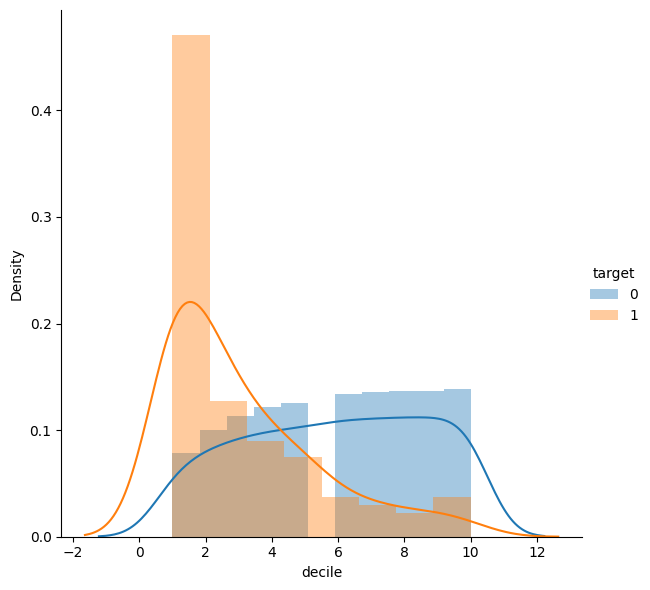

In [143]:
import seaborn as sns

#Create a FacetGrid
g = sns.FacetGrid(chart_data,hue="target",height=6)

#Map distplot onto the grid
g.map(sns.distplot,"decile")

#Add a Legend
g.add_legend()